In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#reading csv file and storing in df  
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### checking nulls

In [3]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

no nulls found

#### checking data types

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


only sex is object categorical data rest all numerical data

#### seperating numerical data and categorical data and plotting

In [5]:
#copying df to B after dropping Sex and Rings
B=df.copy()
B=B.drop(['Rings','Sex'],axis=1)
B

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


#### Univariate analysis

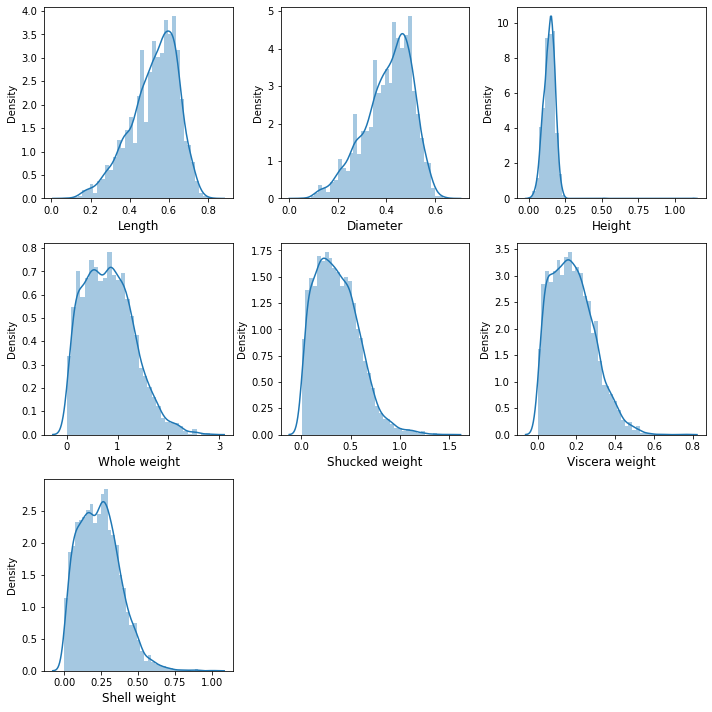

In [6]:
#plotting distribution graph of numerical datas using the loop 
j=0
plt.figure(figsize=(10,10))
for column in B:
    plt.subplot(3,3,j+1)
    sns.distplot(B[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout() 

Length:          negativly skewed, presence of outliers on the left half of the graph, it can be seen that data is centered      around 0.55 mm, most of the specimen have lenght between 0.5 to 0.65, the longest length of specimen is around 0.8 mm

Diameter:        negatively, presence of outliers on the left half of the graph, it can be seen that most of the specimen has diameter around 0.5mm most of the specimen has diameter around 0.4 to 0.55 mm

Height:          appears to be normally dirstributed, it can be seen that the data appears to be centered around 0.05mm

Whole weight:    postively skewed and presence of outliers, also has two modes, it can be seen that there is accumulation of data points around 0.75g and around 

Shucked weight:  postively skewed also presence of oultiers on the right half, it can be seen that most of data is present from 
0.25g to 0.75g 

Viscera weight:  postively skewed also outliers present on the right half, it can be seen that there is accumulation of data around 0.25g

Shell weight:    postively skewed, presence of two modes and outliers present on the right half, it can be seen that there is accumulation of data around 0.02g and around 0.045g 


9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64


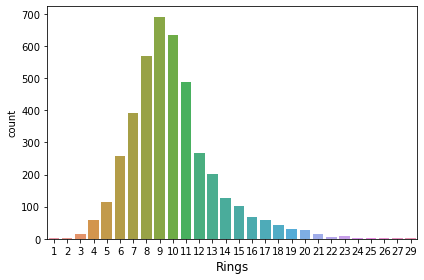

In [7]:
#using countplot to see distribution of ring data in the dataset
sns.countplot(df['Rings'])
plt.xlabel('Rings',fontsize=12)
print(df['Rings'].value_counts())
plt.tight_layout() 

large accumulation of specimen having rings around 8-11

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


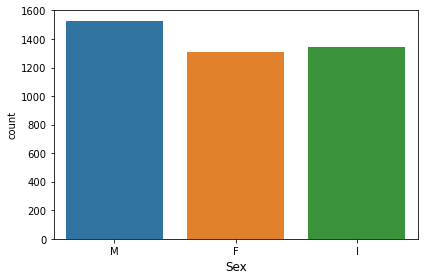

In [8]:
# using countplot to see how the sex dataset is distributed
sns.countplot(df['Sex'])
plt.xlabel('Sex',fontsize=12)
print(df['Sex'].value_counts())
plt.tight_layout() 

M, F, I are almost the same

##### Bivariate analysis

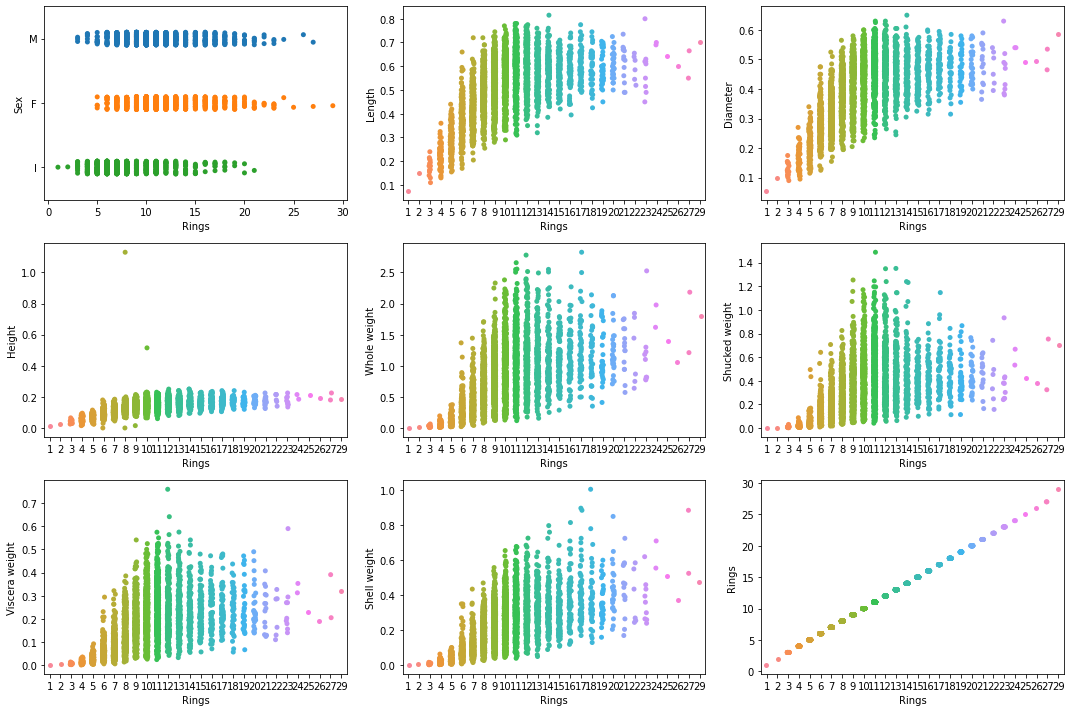

In [9]:
#plotting stripplot between rings and other features and seeing their relationship 
j=0
plt.figure(figsize=(15,10))
for column in df:
    plt.subplot(3,3,j+1)
    sns.stripplot(y=df[column],x=df['Rings'],data=df)
    j+=1
plt.tight_layout() 

sex: most of the female species which was observed were having minimum 5 rings which was not the case for 'M' AND 'I'

length: as the rings increases the length increases this shows the experimental data observed is correct as increase in rings implies increase in age,

Diameter: shows trend similar to length, as the shell size increase the diameter increases 

Height: shows trend similar to length but change is very less

whole weight, Shucked weight, Viscera weight, Shell weight: as the rings increases weight increases 

From this it can be infered that there is a postive correlation between features and label


#### Using power transform to tranform and normalise the dataset which are numerical data types

In [10]:
#using power transform to transform and normalize the dataset and storing it in A 
from sklearn.preprocessing import power_transform
A=power_transform(B)
A=pd.DataFrame(A,columns=B.columns)
A

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...
4172,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


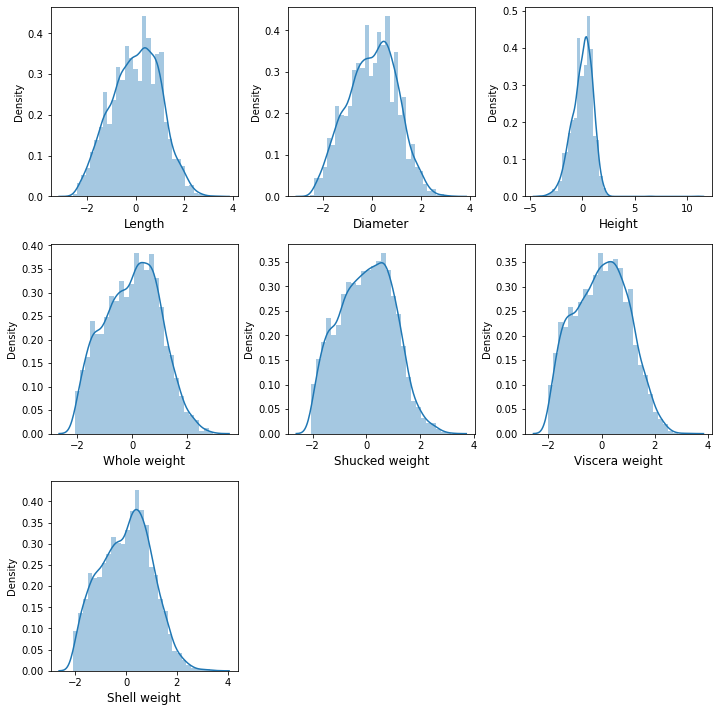

In [11]:
#plotting to see dataset after power transformation
j=0
plt.figure(figsize=(10,10))
for column in A:
    plt.subplot(3,3,j+1)
    sns.distplot(A[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

the datas appear to be normally ditributed checking skewness for confirmation


In [12]:
#copying the relevant changes to df 
df[A.columns]=A.copy()
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,15
1,M,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,7
2,F,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,9
3,M,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,10
4,I,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008,11
4173,M,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215,10
4174,M,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398,9
4175,F,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145,10


#### check skewness

In [13]:
df.skew()

Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
Rings             1.114102
dtype: float64

the skewness is within the acceptable limits -0.65 to +0.65 

#### Encoding categorical data using ordinal encoder

In [14]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['Sex']=oe.fit_transform(df['Sex'].values.reshape(-1,1))
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,15
1,2.0,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,7
2,0.0,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,9
3,2.0,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,10
4,1.0,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008,11
4173,2.0,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215,10
4174,2.0,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398,9
4175,0.0,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145,10


#### statistical approach

In [15]:
# Checking Statistical significance of independent categorical variables with Target: 

for i in df[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight']]: 
    print("\033[1m" + "Hypothesis Formation:" + "\033[0m")
    print("Null Hypothesis (Ho):",i,"and DEFAULT are independent")
    print("Alternate Hypothesis (Ha):",i,"and DEFAULT are dependent")
    print()
    
    obs = pd.crosstab(df[i], df['Rings']) 
    test_stat, pval, dof, exp = stats.chi2_contingency(obs)
    
    print("\033[1m" + "Statistical Significance of relationship between",i,"and Rings:" + "\033[0m") 
    print("Test Statistics: ", test_stat)
    print("pValue: ", pval) 
    print("Degrees of freedom: ", dof) 
    print("\n***************************************************************************************************\n")

Hypothesis Formation:
Null Hypothesis (Ho): Sex and DEFAULT are independent
Alternate Hypothesis (Ha): Sex and DEFAULT are dependent

Statistical Significance of relationship between Sex and Rings:
Test Statistics:  1316.07973176115
pValue:  8.004519071049616e-240
Degrees of freedom:  54

***************************************************************************************************

Hypothesis Formation:
Null Hypothesis (Ho): Length and DEFAULT are independent
Alternate Hypothesis (Ha): Length and DEFAULT are dependent

Statistical Significance of relationship between Length and Rings:
Test Statistics:  17761.4336423867
pValue:  0.0
Degrees of freedom:  3591

***************************************************************************************************

Hypothesis Formation:
Null Hypothesis (Ho): Diameter and DEFAULT are independent
Alternate Hypothesis (Ha): Diameter and DEFAULT are dependent

Statistical Significance of relationship between Diameter and Rings:
Test Statisti

Inference:

==>  From the results of statistical significance analysis of independent categorical variables with target using Chi-Square Test for Independence, we could see the pValue from all the statistical analysis is less than the significance level of 5% (0.05). 

==>  Hence Null hypothesis (Ho) is rejected and Alternate Hypothesis (Ha) can be selected. Thus, it is evident that all the independent categorical variables have significant relationship with the target variable.

#### checking correlation

In [16]:
df.corr()["Rings"]

Sex              -0.034627
Length            0.537096
Diameter          0.558409
Height            0.598130
Whole weight      0.566749
Shucked weight    0.463989
Viscera weight    0.535984
Shell weight      0.641506
Rings             1.000000
Name: Rings, dtype: float64

Sex has negative correltion with Rings

Rest all features has + ve correlation within a range of 0.5 to 0.64 showing that all features have their influnce on the target variable

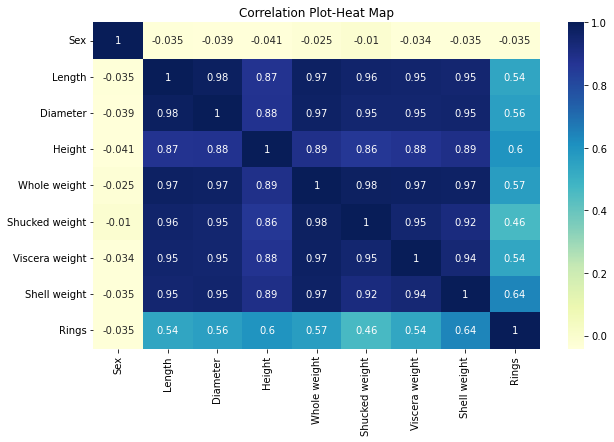

In [17]:
#plotting heatmap to see the correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

all features are showing high level of correlation with each other except sex checking vif for multicollinearity problem

In [18]:
#checking for multicollinearity by using vif
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df.drop('Rings',axis=1)
d=sc.fit_transform(df)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif

,vif,features
0,1.011358,Sex
1,37.232837,Length
2,35.819852,Diameter
3,5.545046,Height
4,148.807755,Whole weight
5,42.789372,Shucked weight
6,23.079346,Viscera weight
7,30.166150,Shell weight


In [19]:
#dropping Whole weight as it exceeds the limit
t=df.drop(['Whole weight','Rings'],axis=1)
t_sa=sc.fit_transform(t)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(t_sa, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif

,vif,features
0,1.011116,Sex
1,37.054274,Length
2,35.690721,Diameter
3,5.385856,Height
4,14.596728,Shucked weight
5,15.026808,Viscera weight
6,13.802248,Shell weight


In [20]:
#dropping Whole weight,Length as it exceeds the limit
t=df.drop(['Whole weight','Rings','Length'],axis=1)
t_sa=sc.fit_transform(t)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(t_sa, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif

,vif,features
0,1.010946,Sex
1,19.091722,Diameter
2,5.379654,Height
3,13.483726,Shucked weight
4,14.521341,Viscera weight
5,13.701961,Shell weight


the vif values is less than 20 

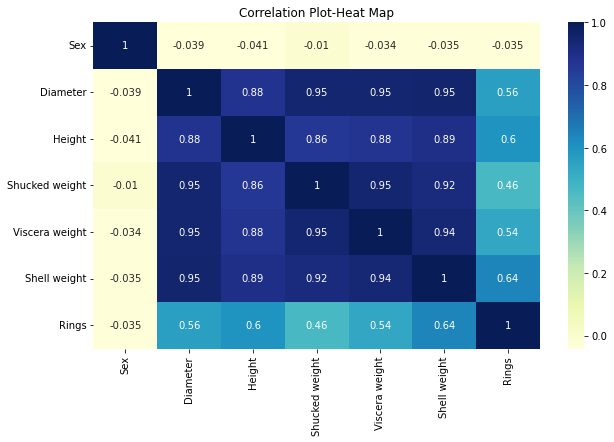

In [21]:
#plotting to see correaltion value on heatmap
C=df.drop(['Whole weight','Length'],axis=1).copy()
plt.figure(figsize=(10,6))
sns.heatmap(C.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

#### Removing outliers using z score

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_x=df[(z<3).all(axis=1)]
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  2.1067751975101747  %


#### spliting data 

In [23]:

X=df_x.drop(['Whole weight','Rings','Length'],axis=1)
Y=df_x['Rings']


#### Trying differnent algorithm

In [88]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
A=[] 
B=[] 
C=[] 
D=[] 
mae=[] 

In [89]:
#loop used to find the best random state
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=(r2_score(y_test,y_pred))*100
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [90]:
# used to get test accuracy, train accuracy, mse, mae
def te_t(regr,x_train,x_test,y_train,y_test,R):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(r2_score(y_test,y_te)*100,1)}")
    A.append(round(r2_score(y_test,y_te)*100,1))
    print(f"train accuracy is {round(r2_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))
    

In [91]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test,R):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(r2_score(y_train,y_tr)*100,1)
    te_ac=round(r2_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

In [92]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor()
R=maxr2_score(reg,X,Y)

r2 score corresponding to  0  is  17.177140506193567
r2 score corresponding to  1  is  8.823255848176359
r2 score corresponding to  2  is  7.48520611104988
r2 score corresponding to  3  is  14.968981885235388
r2 score corresponding to  4  is  9.309285485568564
r2 score corresponding to  5  is  14.121482829381938
r2 score corresponding to  6  is  15.782189684994453
r2 score corresponding to  7  is  17.834374781671357
r2 score corresponding to  8  is  9.45065218392137
r2 score corresponding to  9  is  9.26725495299502
r2 score corresponding to  10  is  8.50608534533669
r2 score corresponding to  11  is  1.1888208914840437
r2 score corresponding to  12  is  -3.205876634237659
r2 score corresponding to  13  is  8.46282780888471
r2 score corresponding to  14  is  -2.837834838257347
r2 score corresponding to  15  is  8.64855577831004
r2 score corresponding to  16  is  12.95864367285644
r2 score corresponding to  17  is  9.233715134030351
r2 score corresponding to  18  is  8.361876054273253
r

In [93]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test,R)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test,R)

test accuracy is 12.5
train accuracy is 100.0


At cv is 2 cv score is 6.65  
 test accuracy is 12.5 

At cv is 3 cv score is -0.52  
 test accuracy is 12.5 

At cv is 4 cv score is -14.28  
 test accuracy is 12.5 

At cv is 5 cv score is -9.11  
 test accuracy is 12.5 

At cv is 6 cv score is -6.52  
 test accuracy is 12.5 

At cv is 7 cv score is -6.25  
 test accuracy is 12.5 

At cv is 8 cv score is -20.84  
 test accuracy is 12.5 

At cv is 9 cv score is -7.71  
 test accuracy is 12.5 

At cv is 10 cv score is -21.05  
 test accuracy is 12.5 

At cv is 11 cv score is -19.04  
 test accuracy is 12.5 

At cv is 12 cv score is -13.77  
 test accuracy is 12.5 

At cv is 13 cv score is -19.01  
 test accuracy is 12.5 

At cv is 14 cv score is -10.19  
 test accuracy is 12.5 

At cv is 15 cv score is -23.14  
 test accuracy is 12.5 

At cv is 16 cv score is -22.36  
 test accuracy is 12.5 

At cv is 17 cv score is -21.42  
 test accuracy is 12.5 

At cv is 18 cv score is -18.56  
 test 

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor()
R=maxr2_score(rf_reg,X,Y)

r2 score corresponding to  0  is  55.22537963310854
r2 score corresponding to  1  is  51.44386965694937
r2 score corresponding to  2  is  51.75497967106681
r2 score corresponding to  3  is  55.65577226388248
r2 score corresponding to  4  is  50.117210258446285
r2 score corresponding to  5  is  51.402094449456385
r2 score corresponding to  6  is  52.932901856261026
r2 score corresponding to  7  is  52.42458491334824
r2 score corresponding to  8  is  50.44345501542282
r2 score corresponding to  9  is  52.81112365774574
r2 score corresponding to  10  is  54.03492005149382
r2 score corresponding to  11  is  50.697996230244456
r2 score corresponding to  12  is  51.29975484637601
r2 score corresponding to  13  is  49.41418478923892
r2 score corresponding to  14  is  48.632158705507656
r2 score corresponding to  15  is  57.371302469863764
r2 score corresponding to  16  is  54.01553780625735
r2 score corresponding to  17  is  54.152879206562154
r2 score corresponding to  18  is  53.34487167055

In [95]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_reg,x2_train,x2_test,y2_train,y2_test,R)
print('\n')
score(rf_reg,x2_train,x2_test,y2_train,y2_test,R)

test accuracy is 57.6
train accuracy is 93.0


At cv is 2 cv score is 50.76  
 test accuracy is 57.6 

At cv is 3 cv score is 49.73  
 test accuracy is 57.6 

At cv is 4 cv score is 41.85  
 test accuracy is 57.6 

At cv is 5 cv score is 43.02  
 test accuracy is 57.6 

At cv is 6 cv score is 43.42  
 test accuracy is 57.6 

At cv is 7 cv score is 44.27  
 test accuracy is 57.6 

At cv is 8 cv score is 39.98  
 test accuracy is 57.6 

At cv is 9 cv score is 44.34  
 test accuracy is 57.6 

At cv is 10 cv score is 39.48  
 test accuracy is 57.6 

At cv is 11 cv score is 38.13  
 test accuracy is 57.6 

At cv is 12 cv score is 40.71  
 test accuracy is 57.6 

At cv is 13 cv score is 39.49  
 test accuracy is 57.6 

At cv is 14 cv score is 41.22  
 test accuracy is 57.6 

At cv is 15 cv score is 39.31  
 test accuracy is 57.6 

At cv is 16 cv score is 37.3  
 test accuracy is 57.6 

At cv is 17 cv score is 38.48  
 test accuracy is 57.6 

At cv is 18 cv score is 40.34  
 test accuracy is 

In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knr = KNeighborsRegressor()
R=maxr2_score(knr,X,Y)

r2 score corresponding to  0  is  48.10482110381946
r2 score corresponding to  1  is  49.874396580040084
r2 score corresponding to  2  is  46.05103513423644
r2 score corresponding to  3  is  51.81449127632811
r2 score corresponding to  4  is  47.89769266445635
r2 score corresponding to  5  is  47.76384715833498
r2 score corresponding to  6  is  49.24023426369808
r2 score corresponding to  7  is  45.86342641527964
r2 score corresponding to  8  is  47.50962273874178
r2 score corresponding to  9  is  47.6831919528865
r2 score corresponding to  10  is  51.53985679255035
r2 score corresponding to  11  is  45.966167997772104
r2 score corresponding to  12  is  50.309617069568645
r2 score corresponding to  13  is  45.86152341251738
r2 score corresponding to  14  is  46.48863786836323
r2 score corresponding to  15  is  53.863847760639686
r2 score corresponding to  16  is  49.2288665877342
r2 score corresponding to  17  is  48.734362850730484
r2 score corresponding to  18  is  48.99863295736362


In [97]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(knr,x3_train,x3_test,y3_train,y3_test,R)
print('\n')
score(knr,x3_train,x3_test,y3_train,y3_test,R)


test accuracy is 55.6
train accuracy is 64.8


At cv is 2 cv score is 45.68  
 test accuracy is 55.6 

At cv is 3 cv score is 46.16  
 test accuracy is 55.6 

At cv is 4 cv score is 40.44  
 test accuracy is 55.6 

At cv is 5 cv score is 40.42  
 test accuracy is 55.6 

At cv is 6 cv score is 42.13  
 test accuracy is 55.6 

At cv is 7 cv score is 41.26  
 test accuracy is 55.6 

At cv is 8 cv score is 38.93  
 test accuracy is 55.6 

At cv is 9 cv score is 41.48  
 test accuracy is 55.6 

At cv is 10 cv score is 36.96  
 test accuracy is 55.6 

At cv is 11 cv score is 36.85  
 test accuracy is 55.6 

At cv is 12 cv score is 39.48  
 test accuracy is 55.6 

At cv is 13 cv score is 37.79  
 test accuracy is 55.6 

At cv is 14 cv score is 38.81  
 test accuracy is 55.6 

At cv is 15 cv score is 37.3  
 test accuracy is 55.6 

At cv is 16 cv score is 34.86  
 test accuracy is 55.6 

At cv is 17 cv score is 36.5  
 test accuracy is 55.6 

At cv is 18 cv score is 37.89  
 test accuracy is 5

In [98]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
R=maxr2_score(lnr,X,Y)

r2 score corresponding to  0  is  54.84349606535296
r2 score corresponding to  1  is  51.93286525366222
r2 score corresponding to  2  is  51.061844513812616
r2 score corresponding to  3  is  52.783676094454
r2 score corresponding to  4  is  52.36336425516339
r2 score corresponding to  5  is  50.66562672592718
r2 score corresponding to  6  is  53.275720274977715
r2 score corresponding to  7  is  51.71774690337999
r2 score corresponding to  8  is  50.53015090545794
r2 score corresponding to  9  is  54.111695290776886
r2 score corresponding to  10  is  53.80295304262393
r2 score corresponding to  11  is  49.90548768454385
r2 score corresponding to  12  is  51.85475704572795
r2 score corresponding to  13  is  48.67753593612839
r2 score corresponding to  14  is  46.427189333570254
r2 score corresponding to  15  is  54.45627262743924
r2 score corresponding to  16  is  52.07094393709173
r2 score corresponding to  17  is  53.64338863773261
r2 score corresponding to  18  is  52.816258737325406


In [99]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(lnr,x4_train,x4_test,y4_train,y4_test,R)
print('\n')
score(lnr,x4_train,x4_test,y4_train,y4_test,R)

test accuracy is 56.6
train accuracy is 50.2


At cv is 2 cv score is 51.14  
 test accuracy is 56.6 

At cv is 3 cv score is 49.89  
 test accuracy is 56.6 

At cv is 4 cv score is 43.49  
 test accuracy is 56.6 

At cv is 5 cv score is 43.03  
 test accuracy is 56.6 

At cv is 6 cv score is 43.82  
 test accuracy is 56.6 

At cv is 7 cv score is 44.42  
 test accuracy is 56.6 

At cv is 8 cv score is 40.88  
 test accuracy is 56.6 

At cv is 9 cv score is 43.9  
 test accuracy is 56.6 

At cv is 10 cv score is 39.5  
 test accuracy is 56.6 

At cv is 11 cv score is 38.94  
 test accuracy is 56.6 

At cv is 12 cv score is 40.88  
 test accuracy is 56.6 

At cv is 13 cv score is 39.38  
 test accuracy is 56.6 

At cv is 14 cv score is 41.12  
 test accuracy is 56.6 

At cv is 15 cv score is 38.98  
 test accuracy is 56.6 

At cv is 16 cv score is 36.52  
 test accuracy is 56.6 

At cv is 17 cv score is 38.22  
 test accuracy is 56.6 

At cv is 18 cv score is 39.46  
 test accuracy is 5

In [100]:
from sklearn.ensemble import AdaBoostRegressor
adboost_reg= AdaBoostRegressor()
R=maxr2_score(adboost_reg,X,Y)

r2 score corresponding to  0  is  44.81204690920105
r2 score corresponding to  1  is  40.516671773361026
r2 score corresponding to  2  is  37.90827866163227
r2 score corresponding to  3  is  40.50542145710392
r2 score corresponding to  4  is  39.800105346838066
r2 score corresponding to  5  is  44.61291557360036
r2 score corresponding to  6  is  38.95810724416465
r2 score corresponding to  7  is  41.55924804587524
r2 score corresponding to  8  is  35.18366092731343
r2 score corresponding to  9  is  32.91736650178435
r2 score corresponding to  10  is  38.833929384815605
r2 score corresponding to  11  is  35.15354175102967
r2 score corresponding to  12  is  36.4959202094125
r2 score corresponding to  13  is  35.5996538588805
r2 score corresponding to  14  is  40.59394227412568
r2 score corresponding to  15  is  44.12933139859236
r2 score corresponding to  16  is  34.14203696648349
r2 score corresponding to  17  is  39.48839318678565
r2 score corresponding to  18  is  36.90251234876515
r2

In [101]:
x5_train,x5_test,y5_train,y5_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_reg,x5_train,x5_test,y5_train,y5_test,R)
print('\n')
score(adboost_reg,x5_train,x5_test,y5_train,y5_test,R)

test accuracy is 40.5
train accuracy is 39.6


At cv is 2 cv score is 37.57  
 test accuracy is 40.5 

At cv is 3 cv score is 37.89  
 test accuracy is 40.5 

At cv is 4 cv score is 20.48  
 test accuracy is 40.5 

At cv is 5 cv score is 19.75  
 test accuracy is 40.5 

At cv is 6 cv score is 27.02  
 test accuracy is 40.5 

At cv is 7 cv score is 22.25  
 test accuracy is 40.5 

At cv is 8 cv score is 12.43  
 test accuracy is 40.5 

At cv is 9 cv score is 20.02  
 test accuracy is 40.5 

At cv is 10 cv score is 10.97  
 test accuracy is 40.5 

At cv is 11 cv score is 5.46  
 test accuracy is 40.5 

At cv is 12 cv score is 15.91  
 test accuracy is 40.5 

At cv is 13 cv score is 5.04  
 test accuracy is 40.5 

At cv is 14 cv score is 16.81  
 test accuracy is 40.5 

At cv is 15 cv score is 9.43  
 test accuracy is 40.5 

At cv is 16 cv score is 1.91  
 test accuracy is 40.5 

At cv is 17 cv score is 5.05  
 test accuracy is 40.5 

At cv is 18 cv score is 6.48  
 test accuracy is 40.5 

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg=GradientBoostingRegressor()
R=maxr2_score(grad_reg,X,Y)

r2 score corresponding to  0  is  57.752098610371874
r2 score corresponding to  1  is  55.52409507814075
r2 score corresponding to  2  is  53.87762967415475
r2 score corresponding to  3  is  56.35306210262303
r2 score corresponding to  4  is  54.09313423489696
r2 score corresponding to  5  is  54.53838650895011
r2 score corresponding to  6  is  55.533390525296355
r2 score corresponding to  7  is  55.18427547592735
r2 score corresponding to  8  is  53.41773066773827
r2 score corresponding to  9  is  56.16452882467515
r2 score corresponding to  10  is  56.75460972539494
r2 score corresponding to  11  is  53.09785310279344
r2 score corresponding to  12  is  54.61650819208309
r2 score corresponding to  13  is  53.43117357934906
r2 score corresponding to  14  is  50.67728520911901
r2 score corresponding to  15  is  58.59870587073313
r2 score corresponding to  16  is  55.98035825352616
r2 score corresponding to  17  is  56.376125412117226
r2 score corresponding to  18  is  56.62926274793752


In [103]:
x6_train,x6_test,y6_train,y6_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_reg,x6_train,x6_test,y6_train,y6_test,R)
print('\n')
score(grad_reg,x6_train,x6_test,y6_train,y6_test,R)

test accuracy is 58.8
train accuracy is 61.6


At cv is 2 cv score is 53.36  
 test accuracy is 58.8 

At cv is 3 cv score is 52.67  
 test accuracy is 58.8 

At cv is 4 cv score is 47.17  
 test accuracy is 58.8 

At cv is 5 cv score is 47.38  
 test accuracy is 58.8 

At cv is 6 cv score is 48.12  
 test accuracy is 58.8 

At cv is 7 cv score is 48.79  
 test accuracy is 58.8 

At cv is 8 cv score is 46.16  
 test accuracy is 58.8 

At cv is 9 cv score is 48.72  
 test accuracy is 58.8 

At cv is 10 cv score is 44.65  
 test accuracy is 58.8 

At cv is 11 cv score is 44.52  
 test accuracy is 58.8 

At cv is 12 cv score is 46.88  
 test accuracy is 58.8 

At cv is 13 cv score is 44.92  
 test accuracy is 58.8 

At cv is 14 cv score is 46.33  
 test accuracy is 58.8 

At cv is 15 cv score is 44.52  
 test accuracy is 58.8 

At cv is 16 cv score is 42.93  
 test accuracy is 58.8 

At cv is 17 cv score is 44.41  
 test accuracy is 58.8 

At cv is 18 cv score is 45.9  
 test accuracy is 

In [104]:
from sklearn.svm import SVR
svr_reg=SVR()
R=maxr2_score(svr_reg,X,Y)

r2 score corresponding to  0  is  56.183117140451344
r2 score corresponding to  1  is  55.519724627995345
r2 score corresponding to  2  is  52.28162983787799
r2 score corresponding to  3  is  55.49476070476875
r2 score corresponding to  4  is  53.492867009732194
r2 score corresponding to  5  is  54.04236748321718
r2 score corresponding to  6  is  55.59587300458799
r2 score corresponding to  7  is  54.66441517770369
r2 score corresponding to  8  is  51.66988052520123
r2 score corresponding to  9  is  54.89639599724774
r2 score corresponding to  10  is  55.51657395727359
r2 score corresponding to  11  is  51.36784596992015
r2 score corresponding to  12  is  54.95058005138183
r2 score corresponding to  13  is  51.68129636104426
r2 score corresponding to  14  is  49.512070946666185
r2 score corresponding to  15  is  57.17737091301951
r2 score corresponding to  16  is  54.9988802535278
r2 score corresponding to  17  is  54.46833757123846
r2 score corresponding to  18  is  56.570794884529185

In [105]:
x7_train,x7_test,y7_train,y7_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(svr_reg,x7_train,x7_test,y7_train,y7_test,R)
print('\n')
score(svr_reg,x7_train,x7_test,y7_train,y7_test,R)

test accuracy is 58.9
train accuracy is 53.4


At cv is 2 cv score is 52.48  
 test accuracy is 58.9 

At cv is 3 cv score is 52.56  
 test accuracy is 58.9 

At cv is 4 cv score is 49.49  
 test accuracy is 58.9 

At cv is 5 cv score is 48.96  
 test accuracy is 58.9 

At cv is 6 cv score is 49.66  
 test accuracy is 58.9 

At cv is 7 cv score is 49.71  
 test accuracy is 58.9 

At cv is 8 cv score is 48.5  
 test accuracy is 58.9 

At cv is 9 cv score is 49.67  
 test accuracy is 58.9 

At cv is 10 cv score is 47.3  
 test accuracy is 58.9 

At cv is 11 cv score is 47.25  
 test accuracy is 58.9 

At cv is 12 cv score is 49.13  
 test accuracy is 58.9 

At cv is 13 cv score is 47.95  
 test accuracy is 58.9 

At cv is 14 cv score is 48.53  
 test accuracy is 58.9 

At cv is 15 cv score is 47.26  
 test accuracy is 58.9 

At cv is 16 cv score is 45.61  
 test accuracy is 58.9 

At cv is 17 cv score is 46.91  
 test accuracy is 58.9 

At cv is 18 cv score is 48.66  
 test accuracy is 5

In [106]:
import xgboost as xgb
xgb=xgb.XGBRegressor()
R=maxr2_score(xgb,X,Y)

r2 score corresponding to  0  is  52.56921741289175
r2 score corresponding to  1  is  45.54910908993213
r2 score corresponding to  2  is  45.03253550652371
r2 score corresponding to  3  is  53.47087150763469
r2 score corresponding to  4  is  46.2355530483891
r2 score corresponding to  5  is  47.97199872165372
r2 score corresponding to  6  is  48.497284692524154
r2 score corresponding to  7  is  46.68404814317526
r2 score corresponding to  8  is  48.644909641926084
r2 score corresponding to  9  is  48.18961212468742
r2 score corresponding to  10  is  52.66488334199322
r2 score corresponding to  11  is  46.6792611349401
r2 score corresponding to  12  is  49.47227554533388
r2 score corresponding to  13  is  46.122476902726696
r2 score corresponding to  14  is  42.50996677974628
r2 score corresponding to  15  is  52.60119287040019
r2 score corresponding to  16  is  49.69045324577651
r2 score corresponding to  17  is  49.82400831734872
r2 score corresponding to  18  is  51.02353378697244
r2

In [107]:
x8_train,x8_test,y8_train,y8_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(xgb,x8_train,x8_test,y8_train,y8_test,R)
print('\n')
score(xgb,x8_train,x8_test,y8_train,y8_test,R)

test accuracy is 54.3
train accuracy is 92.2


At cv is 2 cv score is 45.28  
 test accuracy is 54.3 

At cv is 3 cv score is 45.63  
 test accuracy is 54.3 

At cv is 4 cv score is 37.68  
 test accuracy is 54.3 

At cv is 5 cv score is 38.82  
 test accuracy is 54.3 

At cv is 6 cv score is 38.74  
 test accuracy is 54.3 

At cv is 7 cv score is 40.02  
 test accuracy is 54.3 

At cv is 8 cv score is 35.73  
 test accuracy is 54.3 

At cv is 9 cv score is 39.49  
 test accuracy is 54.3 

At cv is 10 cv score is 35.17  
 test accuracy is 54.3 

At cv is 11 cv score is 33.76  
 test accuracy is 54.3 

At cv is 12 cv score is 36.51  
 test accuracy is 54.3 

At cv is 13 cv score is 34.62  
 test accuracy is 54.3 

At cv is 14 cv score is 35.52  
 test accuracy is 54.3 

At cv is 15 cv score is 37.17  
 test accuracy is 54.3 

At cv is 16 cv score is 32.5  
 test accuracy is 54.3 

At cv is 17 cv score is 33.8  
 test accuracy is 54.3 

At cv is 18 cv score is 37.74  
 test accuracy is 5

In [108]:
L=['DT','RF','KNN','LR','ADA','GRAD','SVR','XGB']

In [109]:
E=pd.DataFrame({'test accuracy':A,'cv_score': B,'diff':D,'mse':C,'mae':mae},index=L)
E

,test accuracy,cv_score,diff,mse,mae
DT,12.5,6.654909,5.845091,7.304401,1.913203
RF,57.6,50.762173,6.837827,3.743364,1.471320
KNN,55.6,46.161757,9.438243,3.569487,1.420049
LR,56.6,51.144366,5.455634,3.493394,1.412776
ADA,40.5,37.892957,2.607043,4.879500,1.818868
GRAD,58.8,53.359419,5.440581,3.366694,1.335734
SVR,58.9,52.562092,6.337908,3.357639,1.315242
XGB,54.3,45.633855,8.666145,3.671074,1.403169


Gradient Boosting is the best model

when comparing test accuracy its 2nd highest, and cv_score as the highest score, when considering differnce between cv_score and test accuracy it has the 2nd least difference, when comparing mse and mae 2nd least error compared to the other models

considering all these factors selected gradient boosting 

#### Hyper paramter tuning

In [110]:
from sklearn.model_selection import GridSearchCV

In [148]:
par={'loss':[ 'squared_error', 'absolute_error'],
     'learning_rate':[1,10,0.1,0.08,0.5,0.05,0.01,0.09,0.4,0.6,0.8],
     'criterion':['friedman_mse','mse'],
     'n_estimators':[10,50,100,150,200,250,300,350,400],
     'max_features' : ['auto', 'sqrt', 'log2']
}

In [149]:
grid=GridSearchCV(grad_reg,par,cv=2)
grid.fit(x6_train,y6_train)
grid.best_params_

{'criterion': 'mse',
 'learning_rate': 0.09,
 'loss': 'squared_error',
 'max_features': 'log2',
 'n_estimators': 150}

In [160]:
grad=GradientBoostingRegressor( criterion= 'mse', learning_rate= 0.09, loss= 'squared_error', max_features= 'log2', n_estimators= 150)
grad.fit(x6_train,y6_train)
y_te=grad.predict(x6_test)
r2=round(r2_score(y6_test,y_te)*100,1)
print(r2)

59.8


In [161]:
cv_score=cross_val_score(grad,X,Y,cv=2)
cv_mean=cv_score.mean()*100
print(cv_mean)

53.29646130510064


# test accuracy increased from 58.8 to 59.8 and cv_score remained almost the same 

#### Storing model and loading it 

In [169]:
import pickle

In [170]:
filename='abalone.pkl'
pickle.dump(grad,open(filename,'wb'))

In [171]:
l_m=pickle.load(open('abalone.pkl','rb'))
re=l_m.score(x6_test,y6_test)
print(re*100)

59.82908435496086
